In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from arch import arch_model

In [2]:
df = pd.read_csv('Suzuki.csv', delimiter=';')
print(df)
print(df.dtypes)

            Date    Price     Open     High      Low     Volume   Change
0     04/01/2018  6742,00  6600,00  6744,00  6588,00  1940000,0   0,0318
1     05/01/2018  6740,00  6742,00  6775,00  6681,00  2010000,0  -0,0003
2     09/01/2018  6653,00  6800,00  6811,00  6648,00  2100000,0  -0,0129
3     10/01/2018  6666,00  6650,00  6699,00  6636,00  1070000,0    0,002
4     11/01/2018  6564,00  6634,00  6644,00  6528,00  1660000,0  -0,0153
...          ...      ...      ...      ...      ...        ...      ...
1447  08/12/2023  5744,00  5732,00  5769,00  5679,00  2320000,0   -0,025
1448  11/12/2023  5742,00  5724,00  5782,00  5708,00  1490000,0  -0,0003
1449  12/12/2023  5639,00  5800,00  5818,00  5638,00  1760000,0  -0,0179
1450  13/12/2023  5682,00  5600,00  5696,00  5545,00  1940000,0   0,0076
1451  14/12/2023  5461,00  5566,00  5595,00  5436,00  2310000,0  -0,0389

[1452 rows x 7 columns]
Date      object
Price     object
Open      object
High      object
Low       object
Volume    obje

In [3]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Open'] = df['Open'].str.replace(',', '.').astype(float)
df['High'] = df['High'].str.replace(',', '.').astype(float)
df['Low'] = df['Low'].str.replace(',', '.').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '.').astype(float)
df['Change'] = df['Change'].str.replace(',', '.').astype(float)

print(df)
df.describe()

            Date   Price    Open    High     Low     Volume  Change
0     04/01/2018  6742.0  6600.0  6744.0  6588.0  1940000.0  0.0318
1     05/01/2018  6740.0  6742.0  6775.0  6681.0  2010000.0 -0.0003
2     09/01/2018  6653.0  6800.0  6811.0  6648.0  2100000.0 -0.0129
3     10/01/2018  6666.0  6650.0  6699.0  6636.0  1070000.0  0.0020
4     11/01/2018  6564.0  6634.0  6644.0  6528.0  1660000.0 -0.0153
...          ...     ...     ...     ...     ...        ...     ...
1447  08/12/2023  5744.0  5732.0  5769.0  5679.0  2320000.0 -0.0250
1448  11/12/2023  5742.0  5724.0  5782.0  5708.0  1490000.0 -0.0003
1449  12/12/2023  5639.0  5800.0  5818.0  5638.0  1760000.0 -0.0179
1450  13/12/2023  5682.0  5600.0  5696.0  5545.0  1940000.0  0.0076
1451  14/12/2023  5461.0  5566.0  5595.0  5436.0  2310000.0 -0.0389

[1452 rows x 7 columns]


,Price,Open,High,Low,Volume,Change
count,1452.000000,1452.000000,1452.000000,1452.000000,1.452000e+03,1452.000000
mean,4968.014807,4971.077135,5025.840220,4914.231061,1.824907e+06,0.000106
std,833.802239,836.965130,837.524591,833.583430,8.684992e+05,0.021457
min,2465.500000,2469.500000,2551.500000,2438.000000,4.430000e+05,-0.139700
25%,4493.250000,4500.000000,4566.000000,4451.750000,1.260000e+06,-0.011725
50%,4867.500000,4870.500000,4921.500000,4818.500000,1.630000e+06,0.000000
75%,5424.250000,5423.500000,5504.250000,5367.000000,2.140000e+06,0.011700
max,7639.000000,7613.000000,7680.000000,7494.000000,9.980000e+06,0.111500


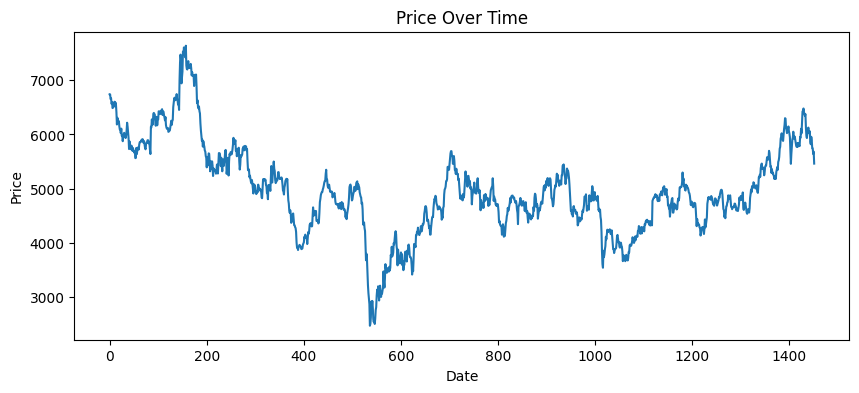

In [4]:
# Assuming you have a DataFrame 'df' with a 'Price' column
plt.figure(figsize=(10, 4))
plt.plot(df['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:
returns = 100 * df.Price.pct_change().dropna()
returns

1      -0.029665
2      -1.290801
3       0.195401
4      -1.530153
5       0.472273
          ...   
1447   -2.495332
1448   -0.034819
1449   -1.793800
1450    0.762547
1451   -3.889476
Name: Price, Length: 1451, dtype: float64

In [6]:
#Split data into train, test sets with a ratio of 6:4
train_size = int(0.7 * len(returns))
test_size =len(returns) - train_size

train_data = returns[:train_size]

#Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

In [7]:
model = arch_model(y_train, p=1, q=5)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 24333554758.441742
Iteration:      2,   Func. Count:     22,   Neg. LLF: 253964.6140836142
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2296.388195817797
Iteration:      4,   Func. Count:     44,   Neg. LLF: 2234.176497429321
Iteration:      5,   Func. Count:     54,   Neg. LLF: 2194.1700940350793
Iteration:      6,   Func. Count:     64,   Neg. LLF: 2189.8222762377527
Iteration:      7,   Func. Count:     74,   Neg. LLF: 2189.8695730429313
Iteration:      8,   Func. Count:     84,   Neg. LLF: 2191.5915487993148
Iteration:      9,   Func. Count:     94,   Neg. LLF: 2186.1926006684016
Iteration:     10,   Func. Count:    104,   Neg. LLF: 2185.2585025414164
Iteration:     11,   Func. Count:    114,   Neg. LLF: 2185.055486298934
Iteration:     12,   Func. Count:    123,   Neg. LLF: 2185.0525324054174
Iteration:     13,   Func. Count:    132,   Neg. LLF: 2185.0524556811088
Iteration:     14,   Func. Count:    141,   Neg. LLF: 2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2185.05
Distribution:                  Normal   AIC:                           4386.10
Method:            Maximum Likelihood   BIC:                           4425.49
                                        No. Observations:                 1015
Date:                Sun, Dec 31 2023   Df Residuals:                     1014
Time:                        18:49:40   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0155  6.624e-02      0.235      0.815 [ -0.114,  0.145]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6323      0.271      2.330  1.980e-02    [  0.100,  1.164]
alpha[1]       0.2890  7.900e-02      3.659  2.534e-04    [  0.134,  0.444]
beta[1]        0.2466      0.155      1.588      0.112 [-5.783e-02,  0.551]
beta[2]    2.0390e-17      0.228  8.949e-17      1.000    [ -0.447,  0.447]
beta[3]        0.1075      0.227      0.473      0.636    [ -0.338,  0.553]
beta[4]        0.1002      0.271      0.371      0.711    [ -0.430,  0.630]
beta[5]        0.1460      0.205      0.714      0.475    [ -0.255,  0.547]
===========================================================================

Covariance estimator: robust
"""

In [8]:
#Find the best model from train
# Assuming 'returns' is your time series data

best_aic = np.inf
best_p, best_q = None, None

# Iterate through different combinations of p and q
max_p, max_q = 5, 5
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        # Calculate AIC for the current model
        aic = model_fit.aic

        # Update the best model parameters if the current model has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_p, best_q = p, q

# Fit the best model to the entire dataset
final_model_fit = arch_model(y_train, vol='Garch', p=best_p, q=best_q).fit(disp='off')


# Display the best model's parameters and AIC
print("Best Model Parameters: p={}, q={}".format(best_p, best_q))
print("AIC of the Best Model: {}".format(best_aic))


Best Model Parameters: p=1, q=4
AIC of the Best Model: 4385.283789305644


In [9]:
rolling_predictions = []

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [10]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

In [11]:
forecasted_next_30_days = []
for i in range(30):
    train = returns[:-(test_size+i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    forecasted_next_30_days.append(np.sqrt(pred.variance.values[-1:][0]))

In [12]:
# 7. Evaluate the accuracy of testing
test_actual_values = returns[-test_size:]
test_predicted_values = rolling_predictions[returns.index[-test_size:]]
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Calculate RMSE
test_rmse = np.sqrt(MSE(test_actual_values, test_predicted_values))
# Calculate MAPE for non-zero actual values
non_zero_mask = test_actual_values != 0
test_mape = np.mean(np.abs((test_actual_values[non_zero_mask] - test_predicted_values[non_zero_mask]) / test_actual_values[non_zero_mask])) * 100
# Calculate MAE
test_mae = MAE(test_actual_values, test_predicted_values)

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    condition = np.abs(error) < delta
    squared_loss = 0.5 * (error**2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss)

# Calculate Huber Loss
test_huber_loss = np.mean(huber_loss(test_actual_values, test_predicted_values, delta=1.0))

# Print
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)
print('Testing Huber Loss:', test_huber_loss)

Testing RMSE: 2.5484080224082204
Testing MAPE: 559.8767774891844
Testing MAE: 2.0965388939199903
Testing Huber Loss: 1.6345190626764818


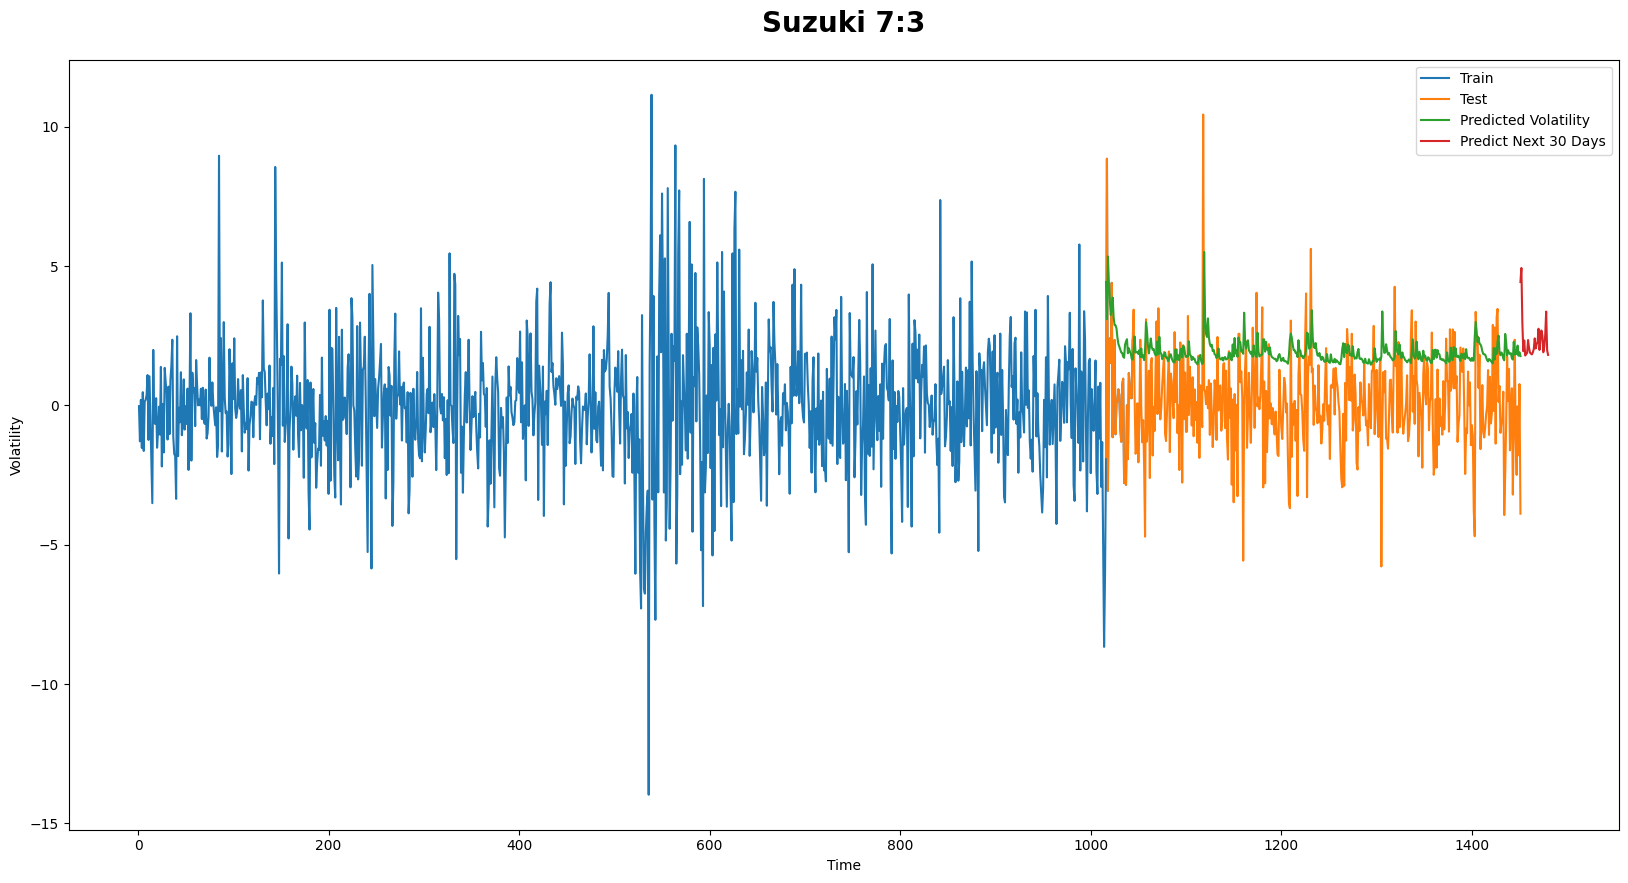

In [13]:
# Lấy index từ ngày tiếp theo trở đi
index_forecasted = range(len(returns), len(returns)+ len(forecasted_next_30_days))

# Plot biểu đồ với index được điều chỉnh
plt.figure(figsize=(20,10 ))
train, = plt.plot(returns[:-(test_size - i)])
test, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
forecast, = plt.plot(index_forecasted, forecasted_next_30_days)


plt.legend(['Train', 'Test', 'Predicted Volatility', 'Predict Next 30 Days'], fontsize=10)
plt.title('Suzuki 7:3', fontweight='bold', fontsize=20, pad=20)
plt.xlabel('Time')
plt.ylabel('Volatility')


# Show the plot
plt.show()